In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('LaMalinche.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head(10)
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
0,25/01/2018,22:00,57,94,5.43,24.1,13.6,57,736.4,0.0,130.7,16.7,43.0,6.0,9.2
1,25/01/2018,23:00,52,274,5.75,34.2,12.2,63,736.6,0.0,106.0,13.9,46.0,6.0,9.3
2,26/01/2018,00:00,42,81,5.98,27.7,10.1,72,736.9,0.0,8.3,9.9,48.0,6.0,9.6
3,26/01/2018,01:00,44,81,5.77,21.6,9.0,75,737.2,0.0,0.0,8.0,54.0,6.0,9.7
4,26/01/2018,02:00,29,82,2.49,20.5,8.4,78,738.1,0.0,0.0,7.6,60.0,6.0,9.7
5,26/01/2018,03:00,28,90,1.91,15.1,7.6,81,738.6,0.0,0.0,5.9,62.0,6.0,9.7
6,26/01/2018,04:00,355,331,1.76,10.8,6.4,86,738.8,0.0,0.0,4.9,67.0,6.0,9.7
7,26/01/2018,05:00,24,315,2.55,10.1,5.7,86,738.7,0.0,0.0,3.9,70.0,6.0,9.7
8,26/01/2018,06:00,9,235,2.97,9.4,4.0,90,738.1,0.0,0.0,2.2,73.0,6.0,9.6
9,26/01/2018,07:00,9,331,2.68,11.9,3.2,92,737.8,0.0,0.0,1.7,77.0,6.0,9.5


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
TEMPCOMB      float64
HUMCOMB       float64
HUMSUBS       float64
TEMPSUBS      float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst = True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head(10)

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
0,57,94,5.43,24.1,13.6,57,736.4,0.0,130.7,16.7,43.0,6.0,9.2,2018-01-25 22:00:00
1,52,274,5.75,34.2,12.2,63,736.6,0.0,106.0,13.9,46.0,6.0,9.3,2018-01-25 23:00:00
2,42,81,5.98,27.7,10.1,72,736.9,0.0,8.3,9.9,48.0,6.0,9.6,2018-01-26 00:00:00
3,44,81,5.77,21.6,9.0,75,737.2,0.0,0.0,8.0,54.0,6.0,9.7,2018-01-26 01:00:00
4,29,82,2.49,20.5,8.4,78,738.1,0.0,0.0,7.6,60.0,6.0,9.7,2018-01-26 02:00:00
5,28,90,1.91,15.1,7.6,81,738.6,0.0,0.0,5.9,62.0,6.0,9.7,2018-01-26 03:00:00
6,355,331,1.76,10.8,6.4,86,738.8,0.0,0.0,4.9,67.0,6.0,9.7,2018-01-26 04:00:00
7,24,315,2.55,10.1,5.7,86,738.7,0.0,0.0,3.9,70.0,6.0,9.7,2018-01-26 05:00:00
8,9,235,2.97,9.4,4.0,90,738.1,0.0,0.0,2.2,73.0,6.0,9.6,2018-01-26 06:00:00
9,9,331,2.68,11.9,3.2,92,737.8,0.0,0.0,1.7,77.0,6.0,9.5,2018-01-26 07:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,72.851190,142.232143,4.593333,20.655952,8.652381,69.142857,732.270833,0.046707,91.546707,8.857485,68.658683,6.359281,8.615569
std,78.495253,93.788140,2.335603,11.013463,4.617514,23.702317,56.843514,0.113956,172.676027,7.092312,19.863623,0.481233,0.578425
min,5.000000,0.000000,0.420000,5.000000,0.800000,14.000000,0.000000,0.000000,0.000000,-0.600000,32.000000,6.000000,7.500000
25%,21.000000,74.750000,2.910000,10.400000,4.875000,51.750000,735.900000,0.000000,0.000000,3.150000,51.500000,6.000000,8.200000
50%,36.000000,103.500000,3.655000,18.700000,7.650000,74.000000,736.650000,0.000000,0.000000,6.300000,71.000000,6.000000,8.600000
75%,121.500000,231.250000,6.515000,29.275000,11.400000,89.000000,737.300000,0.000000,105.400000,13.150000,84.000000,7.000000,9.100000
max,355.000000,353.000000,10.030000,55.400000,21.300000,100.000000,739.000000,0.800000,880.000000,32.300000,99.000000,7.000000,9.700000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS         72.851190
DIRR        142.232143
VELS          4.593333
VELR         20.655952
TEMP          8.652381
HR           69.142857
PB          732.270833
PREC          0.046707
RADSOL       91.546707
TEMPCOMB      8.857485
HUMCOMB      68.658683
HUMSUBS       6.359281
TEMPSUBS      8.615569
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

8.652380952380948

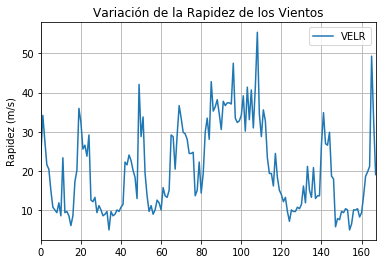

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELR.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

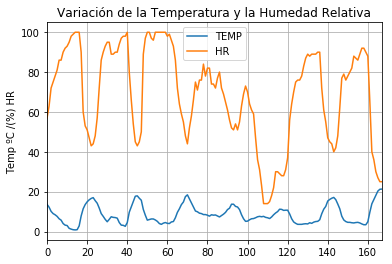

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

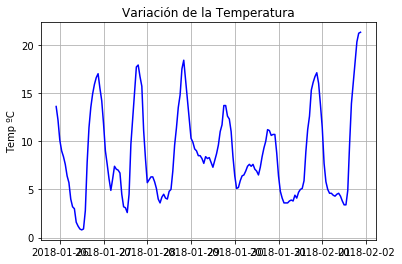

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

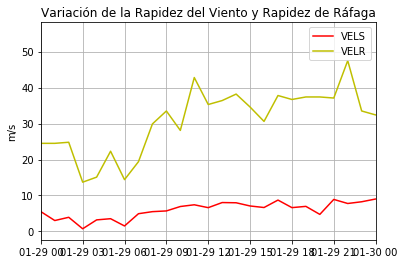

In [15]:
#Crear una gráfica que muestre la rapidez de los vientos y la rapidez de las ráfagas, como funciones del tiempo. ¿Cuáles son las horas del día con más viento?.
# Gráfica de Temperatura y Humedad Relativa
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="r-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="y-")
plt.legend(loc='best')
plt.xlim(['2018-01-29','2018-01-30'])
plt.title("Variación de la Rapidez del Viento y Rapidez de Ráfaga")
plt.ylabel("m/s")
plt.grid(True)
plt.show()

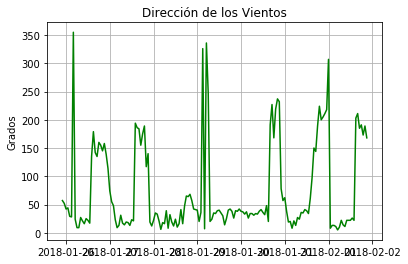

In [16]:
#Crear una gráfica con la dirección de los vientos como función del tiempo y comentar sobre los vientos dominantes en el sitio de estudio.
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="g-")
plt.title("Dirección de los Vientos")
plt.ylabel("Grados")
plt.grid(True)
plt.show()

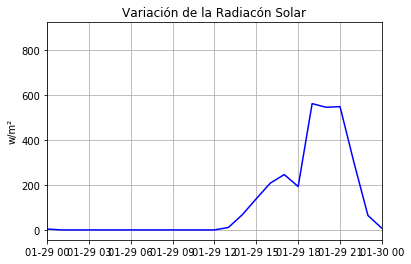

In [17]:
#Muestre el comportamiento de la Radiación Solar como función del tiempo. ¿Que puedes comentar? 
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Variación de la Radiacón Solar")
plt.xlim(['2018-01-29','2018-01-30'])
plt.ylabel("w/m²")
plt.grid(True)
plt.show()

In [18]:
df_DTE = df[df.FECHA >= '2018-01-30 00:00']
df_select = df_DTE[df_DTE.FECHA < '2018-01-30 23:59']
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
98,38,101,9.02,32.4,6.4,69,736.9,0.2,7.3,6.2,43.0,7.0,9.3,2018-01-30 00:00:00
99,37,88,8.85,32.8,5.1,73,737.4,0.0,0.0,4.4,48.0,7.0,9.5,2018-01-30 01:00:00
100,33,86,9.54,34.2,5.2,70,737.8,0.0,0.0,4.4,54.0,6.0,9.5,2018-01-30 02:00:00
101,37,107,10.03,39.2,5.9,64,738.1,0.0,0.0,4.9,58.0,6.0,9.5,2018-01-30 03:00:00
102,26,35,7.63,30.2,6.4,61,738.2,0.0,0.0,5.4,59.0,6.0,9.3,2018-01-30 04:00:00
103,34,100,8.45,41.4,6.5,59,738.0,0.0,0.0,5.5,61.0,6.0,9.2,2018-01-30 05:00:00
104,34,104,8.64,33.1,6.9,47,737.5,0.0,0.0,5.7,61.0,6.0,9.1,2018-01-30 06:00:00
105,31,90,9.15,40.7,7.4,36,737.0,0.0,0.0,6.2,59.0,6.0,9.1,2018-01-30 07:00:00
106,34,93,8.41,31.0,7.6,31,736.3,0.0,0.0,6.2,54.0,6.0,9.0,2018-01-30 08:00:00
107,33,66,8.70,41.4,7.4,23,735.6,0.0,0.0,5.9,51.0,7.0,8.9,2018-01-30 09:00:00


In [19]:
TMin = df_select.TEMP.min()
TMin

5.0999999999999996

In [20]:
TMax = df_select.TEMP.max()
TMax

11.199999999999999

In [21]:
TDif = TMax - TMin
TDif


6.0999999999999996